In [1]:
from analysis.analysis import *
import matplotlib.pyplot as plt
from glob import glob
import os
import numpy as np

# Generating Fig. 9

# of runs: 2400
[[38, 38], [30, 30]] x [35, 17]
[0.5 1. ]
# of runs: 2400
[[38, 38], [34, 34]] x [35, 17]
[0.5  0.75 1.  ]
# of runs: 2400
[[38, 38], [38, 38]] x [35, 17]
[0.5 1. ]
# of runs: 2400
[[42, 42], [30, 30]] x [35, 17]
[0. 1.]
# of runs: 2400
[[42, 42], [34, 34]] x [35, 17]
[0.   0.75 1.  ]


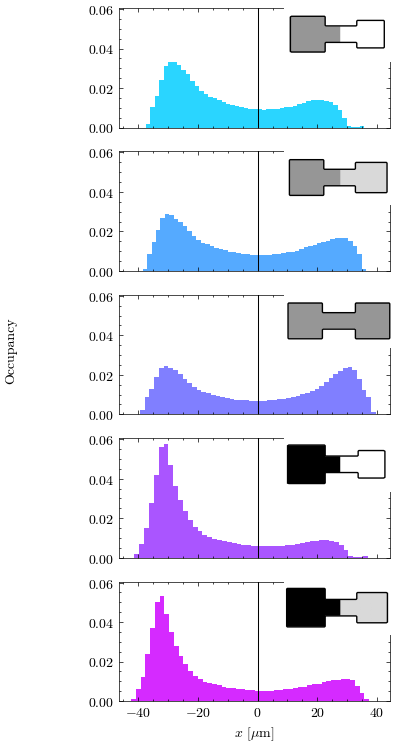

In [2]:
from substrate.substrates import Substrate
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

data_root = "data/diff_geoms/"
gids = np.array([1, 2, 0, 3, 4])
fig, hist_axs = plt.subplots(gids.size, 1, figsize=(3.5, 9), sharex=True, sharey=True)
cmap = plt.get_cmap(name="Purples")
look = {30: 1, 34: 0.75, 38: 0.5, 42: 0}

for k, (gid, hist_ax) in enumerate(zip(gids, hist_axs)):
    grid_df = read_fulltake(
        os.path.join(data_root, f"parquets/fulltake_gid{gid}.parquet"),
        scale_position=True,
    )
    xy = grid_df[["x", "y"]].values
    simbox_config = yaml.safe_load(
        open(os.path.join(data_root, f"configs/grid_id{gid}/simbox.yaml"), "rb")
    )
    chi_og = Substrate(200, 50, 0.01).mixed_two_state_sub(
        simbox_config["substrate"]["basin_dims"],
        simbox_config["substrate"]["bridge_dim"],
    )

    print("# of runs:", grid_df.rid.unique().size)
    print(
        f"{simbox_config['substrate']['basin_dims']}"
        + " x "
        + f"{simbox_config['substrate']['bridge_dim']}"
    )

    f = 0.95
    chi = np.where(chi_og < f, 0.0, 1.0)
    y, x = np.where(chi < f)
    mask = np.where(x > 100)[0]
    chi[y[mask], x[mask]] = look[simbox_config["substrate"]["basin_dims"][1][0]]
    mask = np.where(x <= 100)[0]
    chi[y[mask], x[mask]] = look[simbox_config["substrate"]["basin_dims"][0][0]]
    # chi = np.where(chi == 2, np.nan, chi)

    hist_ax.hist(
        xy[:, 0] - 150,
        bins=50,
        density=True,
        color=plt.get_cmap("cool")((k + 1) / (gids.size + 1)),
    )
    hist_ax.axvline(0, color="black", linewidth=0.75)
    f = 1.1
    sub_ax = inset_axes(
        hist_ax,
        width=f,
        height=f,
        bbox_to_anchor=(1.04, 1.3),
        bbox_transform=hist_ax.transAxes,
        loc="upper right",
    )
    print(np.unique(chi))
    sub_ax.imshow(
        chi,
        origin="lower",
        extent=[0, 50 * 6, 0, 50 * 6],
        cmap="Greys_r",
        vmin=0.0,
        vmax=1.0,
    )
    sub_ax.contour(
        chi_og,
        levels=[0.5],
        origin="lower",
        extent=[0, 50 * 6, 0, 50 * 6],
        colors=["black"],
        linewidths=[1],
    )
    sub_ax.set_xlim((90, 210))
    sub_ax.set_ylim((120, 180))
    sub_ax.set_axis_off()

hist_ax.set_xlabel(r"$x$ [$\mu$m]")
fig.text(-0.2, 0.5, "Occupancy", va="center", rotation="vertical")
# plt.savefig("two_state_dim_sweeps.jpg", dpi=300)
plt.show()

---

# of runs: 2399
center divide...
l_frac = 50.88%, r_frac = 49.12%
basin divide...
l_frac = 51.50%, r_frac = 48.50%
# of runs: 2400
center divide...
l_frac = 52.72%, r_frac = 47.28%
basin divide...
l_frac = 52.48%, r_frac = 47.52%


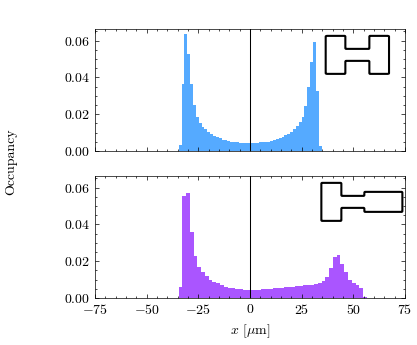

In [3]:
from substrate.substrates import Substrate
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

data_root = "data/diff_geoms/"
gids = np.array([5, 6])
fig, hist_axs = plt.subplots(gids.size, 1, figsize=(4, 3.5), sharex=True, sharey=True)
cmap = plt.get_cmap(name="Purples")
look = {30: 1, 34: 0.75, 38: 0.5, 42: 0}

for k, (gid, hist_ax) in enumerate(zip(gids, hist_axs)):
    grid_df = read_fulltake(
        os.path.join(data_root, f"parquets/fulltake_gid{gid}.parquet"),
        scale_position=True,
    )
    xy = grid_df[["x", "y"]].values
    # simbox_config = yaml.safe_load(
    #     open(os.path.join(data_root, f"configs/grid_id{gid}/simbox.yaml"), "rb")
    # )

    if gid == 5:
        chi = Substrate(200, 50, 0.01).mixed_two_state_sub(
            [[30, 58], [30, 58]],
            [35, 17],
        )

        print("# of runs:", grid_df.rid.unique().size)
        sub_cen = 150
        l_frac = np.where(xy[:, 0] < sub_cen)[0].size
        r_frac = np.where(xy[:, 0] > sub_cen)[0].size
        norm = l_frac + r_frac
        print("center divide...")
        print(f"l_frac = {l_frac / norm:.2%}, r_frac = {r_frac / norm:.2%}")

        l_frac = np.where(xy[:, 0] < sub_cen - 15)[0].size
        r_frac = np.where(xy[:, 0] > sub_cen + 16)[0].size
        norm = l_frac + r_frac
        print("basin divide...")
        print(f"l_frac = {l_frac / norm:.2%}, r_frac = {r_frac / norm:.2%}")

    else:
        chi = Substrate(200, 50, 0.01).mixed_two_state_sub(
            [[30, 58], [58, 30]],
            [35, 17],
        )
        sub_cen = 143
        sub_l = 126
        sub_r = 160

        print("# of runs:", grid_df.rid.unique().size)

        l_frac = np.where(xy[:, 0] < sub_cen)[0].size
        r_frac = np.where(xy[:, 0] > sub_cen)[0].size
        norm = l_frac + r_frac
        print("center divide...")
        print(f"l_frac = {l_frac / norm:.2%}, r_frac = {r_frac / norm:.2%}")

        l_frac = np.where(xy[:, 0] < sub_l)[0].size
        r_frac = np.where(xy[:, 0] > sub_r)[0].size
        norm = l_frac + r_frac
        print("basin divide...")
        print(f"l_frac = {l_frac / norm:.2%}, r_frac = {r_frac / norm:.2%}")

    # print(
    #     f"{simbox_config['substrate']['basin_dims']}"
    #     + " x "
    #     + f"{simbox_config['substrate']['bridge_dim']}"
    # )

    hist_ax.hist(
        xy[:, 0] - sub_cen,
        bins=50,
        density=True,
        color=plt.get_cmap("cool")((k + 1) / (gids.size + 1)),
    )
    hist_ax.set_xlim((-75, 75))
    # hist_ax.set_ylim((0, 0.048))
    hist_ax.axvline(0, color="black", linewidth=0.75)
    f = 1.0
    sub_ax = inset_axes(
        hist_ax,
        width=f,
        height=f,
        bbox_to_anchor=(1.03, 1.25),
        bbox_transform=hist_ax.transAxes,
        loc="upper right",
    )
    sub_ax.contour(
        chi,
        levels=[0.5],
        origin="lower",
        extent=[0, 50 * 6, 0, 50 * 6],
        colors=["black"],
        linewidths=[1.5],
    )
    sub_ax.set_xlim((75, 225))
    sub_ax.set_ylim((75, 225))
    sub_ax.set_axis_off()

hist_ax.set_xlabel(r"$x$ [$\mu$m]")
fig.text(-0.1, 0.5, "Occupancy", va="center", rotation="vertical")
# plt.savefig("two_state_rectangular_basins.jpg", dpi=300)
plt.show()

---

l_frac = 52.50%, r_frac = 47.50%
# of runs: 1392
l_frac = 42.73%, r_frac = 57.27%
# of runs: 1344


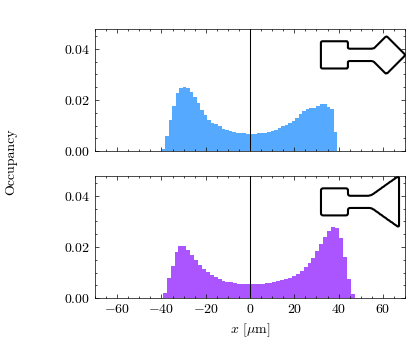

In [4]:
from substrate.substrates import Substrate
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

data_root = "data/diff_geoms/"
gids = np.array([7, 8])
fig, hist_axs = plt.subplots(gids.size, 1, figsize=(4, 3.5), sharex=True, sharey=True)
cmap = plt.get_cmap(name="Purples")
look = {30: 1, 34: 0.75, 38: 0.5, 42: 0}

for k, (gid, hist_ax) in enumerate(zip(gids, hist_axs)):
    grid_df = read_fulltake(
        os.path.join(data_root, f"parquets/fulltake_gid{gid}.parquet"),
        scale_position=True,
    )
    xy = grid_df[["x", "y"]].values
    # simbox_config = yaml.safe_load(
    #     open(os.path.join(data_root, f"configs/grid_id{gid}/simbox.yaml"), "rb")
    # )
    # if simbox_config["substrate"]["kind"] == "square-triangle":
    if gid == 8:
        chi_og = Substrate(200, 50, 0.01).sq_tri_two_state_sub()
        l_num = np.where(xy[:, 0] < 150 - 16)[0].size
        r_num = np.where(xy[:, 0] > 150 + 16)[0].size
        l_frac = (l_num / 192) / (l_num / 192 + r_num / 224)
        r_frac = (r_num / 224) / (l_num / 192 + r_num / 224)
        print(f"l_frac = {l_frac:.2%}, r_frac = {r_frac:.2%}")

    else:
        chi_og = Substrate(200, 50, 0.01).sq_rhom_two_state_sub()
        l_num = np.where(xy[:, 0] < 150 - 16)[0].size
        r_num = np.where(xy[:, 0] > 150 + 16)[0].size
        l_frac = (l_num / 192) / (l_num / 192 + r_num / 187)
        r_frac = (r_num / 187) / (l_num / 192 + r_num / 187)
        print(f"l_frac = {l_frac:.2%}, r_frac = {r_frac:.2%}")

    print("# of runs:", grid_df.rid.unique().size)

    # print(
    #     f"{simbox_config['substrate']['basin_dims']}"
    #     + " x "
    #     + f"{simbox_config['substrate']['bridge_dim']}"
    # )

    hist_ax.hist(
        xy[:, 0] - 150,
        bins=50,
        density=True,
        color=plt.get_cmap("cool")((k + 1) / (gids.size + 1)),
    )
    hist_ax.set_xlim((-70, 70))
    hist_ax.set_ylim((0, 0.048))
    hist_ax.axvline(0, color="black", linewidth=0.75)
    f = 1.0
    sub_ax = inset_axes(
        hist_ax,
        width=f,
        height=f,
        bbox_to_anchor=(1.04, 1.25),
        bbox_transform=hist_ax.transAxes,
        loc="upper right",
    )
    sub_ax.contour(
        chi_og,
        levels=[0.5],
        origin="lower",
        extent=[0, 50 * 6, 0, 50 * 6],
        colors=["black"],
        linewidths=[1.5],
    )
    sub_ax.set_xlim((80, 220))
    sub_ax.set_ylim((80, 220))
    sub_ax.set_axis_off()

hist_ax.set_xlabel(r"$x$ [$\mu$m]")
fig.text(-0.1, 0.5, "Occupancy", va="center", rotation="vertical")
# plt.savefig("square_rhom_tri_states.jpg", dpi=300)
plt.show()